In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## pandas Series

In [2]:
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)


In [6]:
# Accessing elements and slicing

print(life_expectancy[0])
print(gdp[3:6])
    

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [3]:
# Looping

for country_life_expectancy in life_expectancy:
    print('Examining life expectancy {}'.format(country_life_expectancy))
        

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


## Stats on Series

In [10]:
# Pandas functions

print(life_expectancy.mean())
print(life_expectancy.std())

# print the stats for the series
life_expectancy.describe()

72.86999999999999
6.213999474869968


count    20.000000
mean     72.870000
std       6.213999
min      57.600000
25%      70.175000
50%      73.450000
75%      75.650000
max      83.400000
dtype: float64

## Vectorized operations on Series

In [11]:
# Vectorized operations and index arrays

a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])
  
print(a + b)
print(a[a >= 3])

0    2
1    4
2    4
3    6
dtype: int64

2    3
3    4
dtype: int64


In [18]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    mean1 = variable1.mean()
    mean2 = variable2.mean()
    t1 = (variable1 - mean1) >= 0
    t2 = (variable2 - mean2) >= 0
    result = ~ (t1 ^ t2)
    num_same_direction = result.sum()
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

variable_correlation(life_expectancy, gdp)

(17, 3)

In [20]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)


def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html
    '''
    max_country = employment.idxmax()
    return (max_country, employment.loc[max_country])

max_employment(employment)

('Angola', 75.69999695)

## more Series vectorized operations

In [21]:
# Addition when indexes are the same

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])

print(s1 + s2)

a    11
b    22
c    33
d    44
dtype: int64


In [22]:
# Indexes have same elements in a different order

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])

print(s1 + s2)

a    31
b    12
c    43
d    24
dtype: int64


In [23]:
# Indexes overlap, but do not have exactly the same elements

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

print(s1 + s2)

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [25]:
# Indexes do not overlap

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])

print(s1 + s2)

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


## Dealing with missing values in Series operations

In [37]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

result = s1 + s2
result.dropna(inplace=True)  # missing values removed in place

print(result)

c    13.0
d    24.0
dtype: float64


In [36]:
# Add the 2 previous series together, but treating missing values from either series as 0. 
# The result when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])

result = s1.add(s2, fill_value=0)

print(result)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


## pandas Series apply()

In [38]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    def reverse(name):
        names = name.split()
        return names[1] + ', ' + names[0]
        
    return names.apply(reverse)

reverse_names(names)


0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

## Plotting in pandas

In [39]:
# Read all the Gapminder data into DataFrames 

path = '../data/'

employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')


In [42]:
employment

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,
Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.000000,56.000000,55.700001
Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.500000,51.400002,51.400002
Algeria,39.400002,38.900002,39.400002,39.400002,38.099998,38.900002,39.700001,39.500000,39.400002,38.599998,40.400002,41.500000,42.799999,46.400002,48.000000,50.000000,50.500000
Angola,75.800003,75.800003,75.500000,75.900002,75.800003,75.900002,75.699997,75.599998,75.599998,75.500000,75.500000,75.599998,75.500000,75.500000,75.599998,75.500000,75.699997
Argentina,53.599998,53.799999,53.700001,53.799999,53.500000,54.400002,54.900002,55.000000,54.900002,55.500000,55.599998,55.400002,57.299999,57.700001,58.099998,58.400002,58.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,75.599998,75.599998,75.000000,75.500000,75.400002,75.400002,73.400002,73.400002,73.300003,72.000000,72.400002,72.400002,72.099998,71.599998,71.400002,71.199997,71.000000
West Bank and Gaza,29.299999,29.799999,30.400000,26.799999,32.599998,29.500000,31.000000,33.400002,34.599998,33.599998,29.400000,26.600000,29.400000,29.700001,31.400000,31.600000,32.000000
"Yemen, Rep.",38.299999,38.200001,38.000000,39.400002,39.200001,38.799999,39.099998,39.299999,38.200001,38.299999,38.299999,38.400002,38.599998,38.700001,39.000000,39.099998,39.000000


In [43]:
female_completion

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,4.19285,NaN,NaN,5.14529,5.91965,NaN,...,NaN,NaN,NaN,18.74188,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.27718,97.70814,NaN,NaN,NaN,90.41091,89.76010,86.01452,89.53901
Algeria,NaN,NaN,30.90031,33.02938,34.32702,39.7942,45.24156,48.22515,50.49138,51.07383,...,90.09179,91.27633,93.30839,94.21432,NaN,97.35583,109.72854,95.13346,95.87439,94.20928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
life_expectancy

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,28.11878,...,52.500,52.900,53.200,53.600,54.000,54.500,54.800,55.20,55.500,56.200
Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,...,74.400,74.400,74.500,74.700,74.900,75.000,75.200,75.50,75.700,75.800
Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,...,74.200,74.500,74.800,75.000,75.300,75.600,75.900,76.10,76.200,76.300
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.000,83.100,83.200,83.400,83.500,83.600,83.700,83.80,83.800,83.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),33.4030,33.403000,33.403000,33.40300,33.403000,33.403000,33.40300,33.403000,33.403000,33.40300,...,78.358,78.522,78.688,78.861,79.047,79.247,79.463,79.69,79.922,80.152
"Yemen, Rep.",23.3870,23.387000,23.387000,23.38700,23.387000,23.387000,23.38700,23.387000,23.387000,23.38700,...,64.700,65.000,65.400,65.500,65.900,66.200,66.500,66.50,66.700,67.000
Zambia,32.6000,32.600000,32.600000,32.60000,32.600000,32.600000,32.60000,32.600000,32.600000,32.60000,...,47.100,47.900,48.800,49.900,52.000,53.500,54.100,54.60,55.600,56.700


In [45]:
gdp

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chinese Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Create a Pandas Series for each variable for the United States.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

In [51]:
print(employment.index.values)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Rep.' 'Congo, Dem. Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominican Rep.' 'Timor-Leste'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.'
 'Kuwait' 'Kyrgyzstan

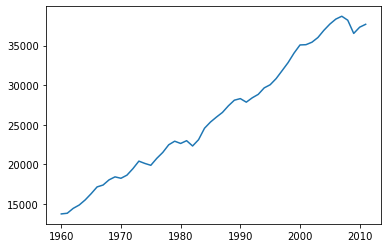

In [54]:
# Use the Series defined above to create a plot of each variable over time for
# the country of  choice.

plot = gdp_us.plot()